# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
- `pd.read_csv()`

### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.loc[...]`, `<pd.df>.iloc[...]` - examine individual cells, columns, rows
    - `loc` works with conditions and column names, `iloc` with numerical indices
    - in both `loc` and `iloc`, multiple columns can be specified as a list of column names, and `:` in each index position means 'all'
    - in `iloc`, both index positions can be specified as lists of numeric values
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)
- `<pd.Series>.dropna(how='all'/'any', inplace=True)` (return a new `<pd.Series>` object with missing values removed)

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of `<column>` is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


### Data transformations
- `<pd.df>.describe()`
- `pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
- `<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns. 
- `sb.heatmap()`
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic might not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb*:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%run "../notebooks/import_packages.ipynb"

In [ ]:
# # %load_ext autoreload
# # %autoreload 2
# 
# %matplotlib inline
# 
# # %config IPCompleter.greedy=True
# 
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# plt.style.use('classic')
# import pandas as pd
# import seaborn as sb
# 
# from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_histogram, theme_xkcd, coord_cartesian, xlim, ylim, xlab, ylab, ggtitle, theme

## Introducing grunge datasets

### Available datasets
Relevant datasets, located in the *data* folder:
* *grunge.csv* - complete raw dataset, located in the *data* folder; copied directly from [this Kaggle dataset](https://www.kaggle.com/datasets/anavui/grunge-bands-dataset), developed by [Ana Vucic](https://www.kaggle.com/anavui)
* *pearl_jam_v1.csv*, *pearl_jam_v2.csv*, *pearl_jam_v3.csv* - incomplete raw Pearl Jam datasets

### Read the *csv* file containing one of the available datasets describing grunge songs
`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [ ]:
# Get the songs as a pd.DataFrame object from 'data/grunge_v1.csv', 
# or from '../data/grunge_v1.csv', 
# or '../../data/grunge_v1.csv', 
# or ..., 
# depending on where the csv file is located

# If an int column contains NaN values, read_csv() sets all values to float values, because NaN are internally
# represented as float values. To read the int columns as int values and still preserve NaN values where they 
# exist, see this: https://stackoverflow.com/a/72323514. 
# The trick is: df = pd.read_csv('file.csv', dtype={'a': 'Int32', 'b': 'Int32'}), assuming that 'a' and 'b' 
# columns contain int and NaN values.

songs = pd.read_csv('../data/grunge_v1.csv')
songs

### Explore the dataset (first steps)

##### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.loc[...]`, `<pd.df>.iloc[...]` - examine individual cells, columns, rows
    - `loc` works with conditions and column names, `iloc` with numerical indices
    - in both `loc` and `iloc`, multiple columns can be specified as a list of column names, and `:` in each index position means 'all'
    - in `iloc`, both index positions can be specified as lists of numeric values
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

###### A sneak peek into the dataset
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, **<u>`<pd.df>.info()`**</u>, `<pd.df>.describe()` (shows descriptive statistics for numerical columns only).

When calling `display()` on a method like `<pd.df>.head()`, `<pd.df>.tail()` and `<pd.df>.sample()`, only a certain default number of columns is displayed. To display *all* columns, use `pd.set_option('display.max_columns', None)` first. To display `<n>` columns, use `pd.set_option('display.max_columns', <n>)` first. 

In [ ]:
songs
songs.tail()
songs.head()
songs.sample(10)
songs.info()
songs.describe()
songs.dtypes
songs.shape

###### Columns
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [ ]:
# Get the columns as a pd.Index object, using <pd.df>.columns
songs.columns
# Get the columns as a list, using list(<pd.df>.columns)
list(songs.columns)
# Get the columns as a list, using <pd.df>.columns.tolist() or <pd.df>.columns.to_list()
songs.columns.tolist()
# Get the columns as a numpy.ndarray object, using <pd.df>.columns.values or np.array(<pd.df>.columns)
songs.columns.values
# Get the values of all items in the dataset as a numpy.ndarray of sequences of the values in each item,
# using <pd.df>.values (the type of both the encompassing and the encompassed sequences is numpy.ndarray)
songs.values

###### Renaming columns
- `<pd.df>.rename(columns={'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, inplace=True)`, or
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns', inplace=True)`;
- `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in `<pd.df>`)

In [ ]:
# Rename the names of some columns
songs.rename({'album_name': 'album', 'track_name': 'track', 'producers': 'produced_by'}, axis='columns', inplace=True)
songs.columns.tolist()
# Rename these columns back to their original names
songs.rename({'produced_by': 'producers'}, axis='columns', inplace=True)
songs.columns.tolist()

###### Rearranging columns
- `<pd.df> = <pd.df>[['<col to be the first>', 'col to be the second'...etc.]]`
- `column_names = ['<col to be the first>', 'col to be the second'...etc.]`, `<pd.df> = <pd.df>.reindex(columns=column_names)`

In [ ]:
columns = ['track', 'artists', 'album', 'album_type', 'duration', 'release_year',]
columns.extend(songs.columns[6:])
songs = songs.reindex(columns=columns)
songs.columns
songs

In [ ]:
# Save the modified dataset
songs.to_csv('../data/grunge_v2.csv', index=False)

##### Missing values and value counts
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum()`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)
- `<pd.df>.dropna(how='all'/'any', inplace=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)` (return a new `<pd.Series>`/`<pd.Series>` object with missing values removed)

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

In [ ]:
# Read the dataset
songs = pd.read_csv('../data/grunge_v2.csv')
songs

In [ ]:
# Display the heatmap (missing values) of the songs dataset 
# (demonstrate using sb.heatmap(songs.isna(), cbar=False, cmap='cividis') vs. 
# sb.heatmap(songs.isna(), cbar=False, cmap='cividis');)
sb.heatmap(songs.isna(), cbar=False, cmap='cividis');

How many missing values are there? (`<pd.df>.isna().sum()` for all columns, `<pd.df>.['<column>'].isna().sum()` for a specific column, `<pd.df>.isna()[['<column1>', 'column2', ...]].sum()` for selected multiple columns; `isnull()` is the same as `isna()`, and `isna()` is used more often).

Try also `<pd.df>.isna()`, `<pd.df>.isna()[['<column1>', 'column2', ...]]`, `type(<pd.df>.isna())`, `type(<pd.df>.isna().sum())`, `type(<pd.df>.isna()[['<column1>', 'column2', ...]].sum())`, `<pd.df>.isna().sum().value_counts()`.

In [ ]:
songs.isna().sum()
songs.album_moods.isna().sum()
songs.isna().sum()[['acousticness', 'album_moods']]
type(songs.isna().sum())

How many missing values are there in the columns where there *are* missing values? `<i> = <pd.df>.isna().sum() > 0`, `<pd.df>.isna().sum()[<i>]`. 
Try also `<i>`, `type(<i>)`, `<i>[<i>]`, `<pd.df>.loc[:, <i>]`.

In [ ]:
i = songs.isna().sum() > 0
i
i[i]
songs.isna().sum()
songs.isna().sum()[i]

Leave out rows with `np.NaN` values: `<pd.df>.dropna()`, `<pd.df>.<column>.dropna()`, `<pd.df>['<column>'].dropna()`.

In [ ]:
songs.dropna()
songs.album_moods.dropna()
songs[['album_moods', 'album_genres']].dropna()

Leave out columns with `np.NaN` values: `<pd.df>.dropna(axis=1)` (or `<pd.df>.dropna(axis=columns)`).

In [ ]:
songs.dropna(axis=1, inplace=True)
songs

In [ ]:
# Save the modified dataset
songs.to_csv('../data/grunge_v3.csv', index=False)

In [ ]:
songs.shape

##### Value counts
Show value counts for a dataframe: `<pd.df>.value_counts()`, `<pd.df>.value_counts(normalize=True)`.
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)


In [ ]:
songs.value_counts()
songs.track.value_counts()
# # songs.track.value_counts(normalize=True)
songs.track.value_counts().sort_values(ascending=False)

##### Duplicates
The `<pd.df>.duplicated()` method returns a `pd.Series` object with boolean values denoting duplicated rows. The removal of duplicated rows is done by `<pd.df>.drop_duplicates()` (see below).

Find/Show *complete* duplicates (if any): `<pd.df>.duplicated()` (keeps the first occurrence by default, i.e. marks duplicates as `True` except for the first occurrence), `<pd.df>.duplicated(keep='last)` (keeps the last occurrence by default, i.e. marks duplicates as `True` except for the last occurrence), `<pd.df>.duplicated(keep=False)` (marks all occurrences as `True`).

Find duplicates based on a specific column): `<pd.df>.<column>.duplicated()`, `<pd.df>.duplicated(subset=['<column>'])`.

Find duplicates based on multiple specific columns: `<pd.df>.duplicated(subset=['<column 1>', '<column 2>',...])`. 

Drop *complete* duplicates (if any): `<pd.df>.drop_duplicates(inplace=True)`.

Remove rows with duplicates in a certain column (if any), keeping the first row with that value in that column (default): `<pd.df>.drop_duplicates('<column>', inplace=True)`, or keeping the last row with that value in that column: `<pd.df>.drop_duplicates('<column>', keep='last', inplace=True)`.

In [2]:
# Read the dataset
songs = pd.read_csv('../data/grunge_v3.csv')

In [3]:
# Show duplicated songs (complete duplicates)
songs.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
702    False
703    False
704    False
705    False
706    False
Length: 707, dtype: bool

In [4]:
# Show duplicates based on the song title (the 'track' column) only
songs.duplicated('track')

0      False
1      False
2      False
3      False
4      False
       ...  
702    False
703    False
704    False
705    False
706    False
Length: 707, dtype: bool

In [5]:
# Show the effect of removing duplicates based on the song title (the 'track' column), i.e. without inplace=True
songs.drop_duplicates('track')

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
703,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
704,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
705,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483


##### Removing the rows with a specific value (specific values) in a certain column
Use: `<pd.df> = <pd.df>[<pd.df>.<column> == <value>, inplace=True)`, `<pd.df> = <pd.df>[<pd.df>['<column>'] == <value>, inplace=True)`, `<pd.df> = <pd.df>[<pd.df>.<column> != <value>, inplace=True)`, `<pd.df> = <pd.df>[<pd.df>['<column>'] != <value>, inplace=True)`, `<pd.df>[<pd.df>.<column>.isin([<value 1>, <value 2>, ...])]`, and the like.

In [6]:
# Remove the songs appearing on live, compilation, and box set albums, using
# <pd.df>[<pd.df>.<column>.isin([<value 1>, <value 2>, ...])]
songs = songs.loc[songs.album_type.isin(['studio album', 'single', 'extended play'])]
songs

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
703,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
704,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
705,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483


In [8]:
# Check for duplicates now; if there ARE duplicates left, examine them and their features manually
songs.track.duplicated()
songs.track.duplicated().sum()

1

In [10]:
songs.loc[songs.track.duplicated()]

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
557,Better Man,Pearl Jam,Vitalogy,studio album,268,1994,0.165,0.445,0.671,0.000016,2,0.0791,-7.937,1,0.0387,125.712,4,0.267


In [11]:
songs.loc[songs.track == 'Better Man']

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
479,Better Man,Pearl Jam,Backspacer,studio album,296,2009,0.00444,0.249,0.877,0.000002,2,0.9660,-6.872,1,0.0946,140.688,4,0.298
557,Better Man,Pearl Jam,Vitalogy,studio album,268,1994,0.16500,0.445,0.671,0.000016,2,0.0791,-7.937,1,0.0387,125.712,4,0.267


In [12]:
# Remove the remaining duplicate: <pd.df>.drop_duplicates('track', keep='first'|'last', inplace=True);
# alternatively, <pd.df>.drop(index=<i>, inplace=True), <pd.df>.drop(index=[<i1>, <i2>, ...], inplace=True)
songs.drop_duplicates('track', keep='last', inplace=True)

In [18]:
# Check for duplicates now
songs.track.duplicated().sum()

0

In [19]:
songs

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
703,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
704,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
705,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483


In [20]:
# Reset index to 0:n: <pd.df>.reset_index(drop=True, inplace=True); drop=True: do not insert index into columns
songs.reset_index(drop=True, inplace=True)

In [21]:
songs

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
376,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
377,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
378,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483


In [23]:
# Check songs.index now for continuity
songs.index
songs.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [24]:
# Save the modified dataset
songs.to_csv('../data/grunge_v4.csv', index=False)

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

Read a dataset with missing values.

In [25]:
songs = pd.read_csv('../data/grunge_v2.csv')

Take a sample of the dataset to get a feeling of what's in there.

In [26]:
songs.sample(10)

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,...,rock_digital_song_sales_peak_date,rock_digital_song_sales_weaks_on_chart,alternative_digital_song_sales_debut_date,alternative_digital_song_sales_peak_pos,alternative_digital_song_sales_peak_date,alternative_digital_song_sales_weaks_on_chart,canadian_digital_song_sales_debut_date,canadian_digital_song_sales_peak_pos,canadian_digital_song_sales_peak_date,canadian_digital_song_sales_weaks_on_chart
41,Tourette'S,Nirvana,Live At Reading,live album,110,2009,0.000080,0.352,0.989,0.988000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,In Hiding,Pearl Jam,Yield,studio album,299,1998,0.002370,0.413,0.753,0.000037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,Worse Dreams - Demo,Soundgarden,King Animal,studio album,200,2012,0.000130,0.665,0.495,0.511000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,We Die Young,Alice In Chains,Music Bank,compilation album,152,1999,0.000038,0.472,0.971,0.000230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Breath on a Window,Alice In Chains,The Devil Put Dinosaurs Here,studio album,319,2013,0.000054,0.253,0.864,0.605000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
660,Rowing,Soundgarden,King Animal,studio album,306,2012,0.071000,0.524,0.629,0.000028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Negative Creep,Nirvana,Live At Reading,live album,172,2009,0.001720,0.208,0.979,0.826000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Lithium,Nirvana,Sliver - The Best Of The Box,compilation album,108,2005,0.885000,0.572,0.350,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Sea Of Sorrow,Alice In Chains,The Essential Alice In Chains,compilation album,350,2006,0.053400,0.262,0.912,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Lounge Act,Nirvana,Nevermind,studio album,156,1991,0.000004,0.369,0.908,0.006480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What are the songs that have *some* missing values? 
Use masking to create the index of such elements; e.g. `<i>`, e.g., `<i> = songs.isna().sum() > 0` and show the type of the result (it's a `pd.Series` object).
Display `<i>.index` and `<i>.values`. 

In [27]:
i = songs.isna().sum() > 0

From the `pd.Series` object `<i>` created in the previous step, select the elements that have the values > 0 (i.e., the names of the columns that have some `NaN` values) - `<i>[<i>]`, `<i>[<i>.values]` (returns only those elements where `<i>[<i>.values]` is `True`), `<i>[<i>.values > 0]` (works because `<i>.values` are `True` and `False`, and `True.__int__() = 1`).

In [33]:
i
i[i]
i[i].index
i[i].values
i.index
i.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Also, from the `<pd.df>` select a subset with only those *columns* that have *some* `NaN` values - `<pd.df>.loc[:, <i>]`.

In [34]:
songs.loc[:, i]

,producers,writers,track_composers,track_genres,track_styles,track_moods,track_themes,album_duration,album_genres,album_styles,...,rock_digital_song_sales_peak_date,rock_digital_song_sales_weaks_on_chart,alternative_digital_song_sales_debut_date,alternative_digital_song_sales_peak_pos,alternative_digital_song_sales_peak_date,alternative_digital_song_sales_weaks_on_chart,canadian_digital_song_sales_debut_date,canadian_digital_song_sales_peak_pos,canadian_digital_song_sales_peak_date,canadian_digital_song_sales_weaks_on_chart
0,Jack Endino,Kurt Cobain,Kurt Cobain,Pop/Rock,"Alternative/Indie Rock, Grunge, Alternative Po...","Angst-Ridden, Aggressive, Harsh, Snide, Viscer...","Cool & Cocky, Guys Night Out",42:14:00,Pop/Rock,"Alternative Pop/Rock, Alternative/Indie Rock, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jack Endino,Kurt Cobain,Kurt Cobain,Pop/Rock,"Alternative/Indie Rock, Grunge, Alternative Po...","Cathartic, Intense, Angst-Ridden, Crunchy, Vol...","Cool & Cocky, Guys Night Out",42:14:00,Pop/Rock,"Alternative Pop/Rock, Alternative/Indie Rock, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jack Endino,Kurt Cobain,Kurt Cobain,Pop/Rock,"Alternative Pop/Rock, Alternative/Indie Rock, ...","Yearning, Brooding, Earnest, Intimate, Melanch...","Heartache, Introspection, Breakup, Feeling Blu...",42:14:00,Pop/Rock,"Alternative Pop/Rock, Alternative/Indie Rock, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jack Endino,Kurt Cobain,Kurt Cobain,Pop/Rock,"Alternative/Indie Rock, Grunge, Alternative Po...","Angst-Ridden, Aggressive, Harsh, Visceral, Ace...","Cool & Cocky, Guys Night Out",42:14:00,Pop/Rock,"Alternative Pop/Rock, Alternative/Indie Rock, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jack Endino,Robbie van Leeuwen,Robbie Van Leeuwen,Pop/Rock,"Alternative/Indie Rock, Grunge, Alternative Po...","Aggressive, Raucous, Visceral, Acerbic, Energe...","Cool & Cocky, Guys Night Out",42:14:00,Pop/Rock,"Alternative Pop/Rock, Alternative/Indie Rock, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,NaN,Hiro Yamamoto,Hiro Yamamoto,Pop/Rock,"Alternative Metal, Alternative Pop/Rock, Alter...","Brooding, Earnest, Gloomy, Harsh, Literate, Pa...",Imagination,53:06:00,NaN,"Alternative Metal, Alternative Pop/Rock, Alter...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,NaN,"Chris Cornell, Hiro Yamamoto","Chris Cornell, Hiro Yamamoto",Pop/Rock,"Alternative Metal, Alternative Pop/Rock, Alter...","Brooding, Earnest, Gloomy, Harsh, Literate, Pa...",Imagination,53:06:00,NaN,"Alternative Metal, Alternative Pop/Rock, Alter...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,NaN,Chris Cornell,Chris Cornell,Pop/Rock,"Alternative Metal, Alternative Pop/Rock, Alter...","Brooding, Earnest, Gloomy, Harsh, Literate, Pa...",Imagination,53:06:00,NaN,"Alternative Metal, Alternative Pop/Rock, Alter...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,NaN,Chris Cornell,Chris Cornell,Pop/Rock,"Alternative Metal, Alternative Pop/Rock, Alter...","Brooding, Earnest, Gloomy, Harsh, Literate, Pa...",Imagination,53:06:00,NaN,"Alternative Metal, Alternative Pop/Rock, Alter...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How many `NaN`s are there in each column that has `NaN`s? `<pd.df>.isna().sum()[i]`.

In [35]:
# songs.isna().sum()
songs.isna().sum()[i]

producers                                        422
writers                                          335
track_composers                                   49
track_genres                                     136
track_styles                                     135
                                                ... 
alternative_digital_song_sales_weaks_on_chart    697
canadian_digital_song_sales_debut_date           697
canadian_digital_song_sales_peak_pos             697
canadian_digital_song_sales_peak_date            697
canadian_digital_song_sales_weaks_on_chart       697
Length: 79, dtype: int64

From a `<pd.df>` select all *rows* that have *some* missing values: `<pd.df>[<pd.df>.isna().any(axis=1)]`, `<pd.df>.loc[<pd.df>.isna().any(axis=1)]`, `<pd.df>.loc[<pd.df>.isna().any(axis=1), :]`.

In [36]:
songs.loc[songs.isna().any(axis=1), :]

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,...,rock_digital_song_sales_peak_date,rock_digital_song_sales_weaks_on_chart,alternative_digital_song_sales_debut_date,alternative_digital_song_sales_peak_pos,alternative_digital_song_sales_peak_date,alternative_digital_song_sales_weaks_on_chart,canadian_digital_song_sales_debut_date,canadian_digital_song_sales_peak_pos,canadian_digital_song_sales_peak_date,canadian_digital_song_sales_weaks_on_chart
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
703,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select rows based on column conditions: `<pd.df>.loc[<pd.df>.<column 1> == <...>]`, `<pd.df>.loc[(<pd.df>.<column 1> == <...>) & (<pd.df>.<column 2> == <...>)]`, etc. Notice the use of `&`, not `and`.

In [41]:
songs.loc[songs.artists == 'Alice In Chains']
songs.loc[(songs.artists == 'Alice In Chains') & (songs.album_type == 'studio album')]

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,...,rock_digital_song_sales_peak_date,rock_digital_song_sales_weaks_on_chart,alternative_digital_song_sales_debut_date,alternative_digital_song_sales_peak_pos,alternative_digital_song_sales_peak_date,alternative_digital_song_sales_weaks_on_chart,canadian_digital_song_sales_debut_date,canadian_digital_song_sales_peak_pos,canadian_digital_song_sales_peak_date,canadian_digital_song_sales_weaks_on_chart
238,The One You Know,Alice In Chains,Rainier Fog,studio album,289,2018,0.000222,0.557,0.772,0.019200,...,05.19.18,1.0,05.19.18,10.0,05.19.18,1.0,NaN,NaN,NaN,NaN
239,Rainier Fog,Alice In Chains,Rainier Fog,studio album,301,2018,0.000110,0.539,0.909,0.613000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,Red Giant,Alice In Chains,Rainier Fog,studio album,325,2018,0.000028,0.470,0.845,0.329000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,Fly,Alice In Chains,Rainier Fog,studio album,318,2018,0.000235,0.517,0.814,0.061700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,Drone,Alice In Chains,Rainier Fog,studio album,390,2018,0.001180,0.352,0.804,0.000085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Sunshine,Alice In Chains,Facelift,studio album,285,1990,0.002970,0.178,0.787,0.000007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,Put You Down,Alice In Chains,Facelift,studio album,195,1990,0.000680,0.363,0.901,0.000019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,Confusion,Alice In Chains,Facelift,studio album,344,1990,0.006660,0.251,0.734,0.000047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,I Know Somethin (Bout You),Alice In Chains,Facelift,studio album,262,1990,0.000080,0.414,0.822,0.000002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What are the rows that have missing values in a specific column of a `<pd.df>`? For example, what are the songs with missing `track_composers` values?

Using `isna()`, `loc[]`, `iloc[]`, `len()` and `index`.

Calling `loc[]` effectively means *creating a subset* (typically based on a relational or logical expression over one or more columns of the dataset). In other words, `loc[]` creates a *slice* of the dataframe, so the type of the result is `<pd.df>`.

Note that `loc[]` works as `loc[<selected rows>, <selected columns>]`. The indices `<selected rows>` and `<selected columns>` can be created either directly in `loc[]` or beforehand.

If defining the <selected rows> index to be used with `loc[]` subsequently, it is a good practice to define it as a boolean *mask* over a single column, like `<pd.df>['<column>'].isna()`, or as a logical expression in which each chunk is a relational expression over a single column, e.g. `<pd.df>['<column1>'].isna() & <pd.df>['<column2>'] < 23`. The result will be a subset of the original dataframe (i.e., another `<pd.df>`).

Defining the relevant index with a statement like `<pd.df>.loc[<pd.df>['<column>'].isna()].index` is a good starting point when using `iloc[]` subsequently.

If using `iloc[]`, don't forget the `.index` chunk in the statement used to create the index (such as `<pd.df>.loc[<pd.df>['<column>'].isna()].index`). Without it, the result is another `<pd.df>`.

In [49]:
i = songs.track_composers.isna()
i[i]
i[i].index

# Define i_iloc, the index to be used with iloc[], starting from <i> = <pd.df>['<column>'].isna();
# iloc[] can be used conveniently here if the relevant index is already defined with <pd.df>.loc[<i>].index, i.e. <pd.df>.loc[<pd.df>['<column>'].isna()].index;
# remember that the second index in iloc[] must be a number too (the relevant column index)
i_iloc = i[i].index

# Define i_loc, the index (boolean mask) to be used with loc[], e.g. i_loc = <pd.df>['<column>'].isna()
i_loc = i

# display(songs.loc[i_loc.index, ['track', 'track_composers']])
# display(songs.iloc[i_iloc, [0, 20]])

songs.iloc[i_iloc, [0, 1, 20]]
songs.loc[i_loc, ['track', 'artists', 'track_composers']]


,track,artists,track_composers
165,Moist Vagina,Nirvana,NaN
237,All Apologies/Gallons Of Rubbing Alcohol Flow ...,Nirvana,NaN
271,Black Gives Way to Blue - Piano Mix,Alice In Chains,NaN
272,Your Decision - Live,Alice In Chains,NaN
314,Untitled,Alice In Chains,NaN
375,What the Hell Have I - Remix,Alice In Chains,NaN
376,A Little Bitter - Remix,Alice In Chains,NaN
378,Again - Tattoo of Pain Mix,Alice In Chains,NaN
408,Right Turn,Alice In Chains,NaN
409,Rain When I Die,Alice In Chains,NaN


Replace `NaN` values in `track_composers` with `'unknown'` (`<pd.df>.loc[<i_loc>, '<column>'] = <new value>`, `<pd.df>.iloc[<i_iloc>, <column index>] = <new value>`).

In [50]:
# Make the replacement and display it
songs.loc[i_loc, 'track_composers'] = 'unknown'

In [51]:
songs.loc[i_loc, ['track', 'artists', 'track_composers']]

,track,artists,track_composers
165,Moist Vagina,Nirvana,unknown
237,All Apologies/Gallons Of Rubbing Alcohol Flow ...,Nirvana,unknown
271,Black Gives Way to Blue - Piano Mix,Alice In Chains,unknown
272,Your Decision - Live,Alice In Chains,unknown
314,Untitled,Alice In Chains,unknown
375,What the Hell Have I - Remix,Alice In Chains,unknown
376,A Little Bitter - Remix,Alice In Chains,unknown
378,Again - Tattoo of Pain Mix,Alice In Chains,unknown
408,Right Turn,Alice In Chains,unknown
409,Rain When I Die,Alice In Chains,unknown


Double-check the missing values now:

In [52]:
# Use <pd.df>.<column>.isna().sum(), or <pd.df>.isna().sum()['<column>'], or 
# sb.heatmap(<pd.df>.isna(), cmap='...')
songs.track_composers.isna().sum()

0

How many songs from the beginning of the grunge era are there?

In [53]:
# Define the beginning of the grunge era as a list comprehension
early_years = [y for y in range(1989, 1995)]
# Display the songs from the early years using a combination of <pd.df>.loc[] and isin()
songs.loc[songs.release_year.isin(early_years), ['track', 'artists', 'release_year']]

,track,artists,release_year
0,Blew,Nirvana,1989
1,Floyd The Barber,Nirvana,1989
2,About A Girl,Nirvana,1989
3,School,Nirvana,1989
4,Love Buzz,Nirvana,1989
...,...,...,...
702,I Awake,Soundgarden,1989
703,No Wrong No Right,Soundgarden,1989
704,Uncovered,Soundgarden,1989
705,Big Dumb Sex,Soundgarden,1989


### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>.<column>.groupby()`, `<pd.df>.groupby('<column>')`, `<pd.df>.groupby('<column>').get_group(<value>)`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


Read a dataset without missing values.

In [54]:
songs = pd.read_csv('../data/grunge_v4.csv')

How many unique values for `release_year` are there in the dataset (`<pd.df>['<column>'].unique()`, `<pd.df>.<column>.unique()`; `<pd.df>['<column>'].nunique()`, `<pd.df>.<column>.nunique()`)?

In [56]:
songs.release_year.unique()
songs.release_year.nunique()

20

Group the songs in the dataset by the year of release (`<pd.df>.groupby('<column>')`). The result can be `songs_by_year`. Display it, show its type, and explore its individual groups and their types (`<pd.df>.groupby('<column>').get_group(<value>)`). 

In [59]:
songs_by_year = songs.groupby('release_year')
songs_by_year
songs_by_year.get_group(1989)
type(songs_by_year.get_group(1989))

pandas.core.frame.DataFrame

How many songs are there in the dataset for each `release_year` (`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts()[<year>]`, `<pd.df>['<column>'].value_counts().sort_index()`)?

Note that `value_counts()` returns a `pd.Series` object, with the index equal to `<pd.df>['<column>'].unique()` values.

In [66]:
songs.release_year.value_counts()
# type(songs.release_year.value_counts())
songs.release_year.value_counts().sort_index(ascending=False)
songs.release_year.value_counts().sort_values(ascending=True)

release_year
1999     2
2018    10
2020    12
1990    12
1998    13
2000    13
2006    13
1992    14
1995    14
2002    15
2012    16
2017    19
1991    23
2009    24
1989    25
2016    27
1993    28
1996    29
2013    35
1994    36
Name: count, dtype: int64

Sort the songs from the dataset by the year of release (`<pd.df>.sort_values(by='<column name>', ascending=False/True)`).
(It is also possible to use `inplace=True` in `sort_values()`, but it will change the order of songs in the dataset from that point on.)

In [67]:
songs.sort_values('release_year')

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
377,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
376,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
375,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
374,Loud Love,Soundgarden,Louder Than Love,studio album,297,1989,0.006000,0.340,0.797,0.076300,2,0.0781,-10.745,1,0.0535,135.407,4,0.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Dance Of The Clairvoyants,Pearl Jam,Gigaton,studio album,265,2020,0.010600,0.734,0.717,0.000854,11,0.0796,-7.772,0,0.0413,113.975,4,0.637
119,Superblood Wolfmoon,Pearl Jam,Gigaton,studio album,229,2020,0.005560,0.511,0.930,0.000000,9,0.3950,-5.174,1,0.0521,153.389,4,0.884
118,Who Ever Said,Pearl Jam,Gigaton,studio album,311,2020,0.001300,0.476,0.907,0.000007,9,0.1670,-5.661,1,0.0516,149.160,4,0.527
128,Retrograde,Pearl Jam,Gigaton,studio album,322,2020,0.172000,0.463,0.620,0.000028,8,0.1110,-8.141,1,0.0301,107.076,4,0.259


Group the songs in the dataset by the year of release and display `mean` and/or `max` duration of the songs in each year, as well as the number (`count`) of songs in each year (`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`), `<pd.df>.groupby('<column>').<another column>.agg(['f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`, `max()`,...)).
If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.

In [69]:
# Make the groupings and aggregations

# <pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)
songs.groupby('release_year').duration.mean().sort_values(ascending=False)
# <pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)
songs.groupby('release_year').duration.agg(['count', 'mean', 'max']).sort_values(by='count', ascending=False)


,count,mean,max
release_year,,,
1994,36,259.555556,443
2013,35,264.914286,427
1996,29,238.206897,366
1993,28,283.785714,1892
2016,27,292.074074,440
1989,25,229.840000,360
2009,24,246.375000,426
1991,23,249.695652,546
2017,19,221.842105,469


## Data visualization
Plot some scatterplots, line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

[Matplotlib examples](https://matplotlib.org/stable/gallery/index.html)

[Seaborn examples](https://seaborn.pydata.org/examples/index.html) (see also [The Python Graph Gallery](https://www.python-graph-gallery.com/); it has a very neat user interface!)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the hood).

<b>IMPORTANT: Matplotlib terminology, Figure vs. Axes</b><br>
A `Figure` object in Matplotlib is the outermost container for a Matplotlib graphic, which can contain multiple `Axes` objects. One source of confusion is the name: an `Axes` actually translates into what we think of as an individual plot or graph (rather than the plural of "axis", as we might expect).

##### Missing values

Read the dataset.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [70]:
# Get the songs as a pd.DataFrame object from 'data/grunge_v4.csv', 
# or from '../data/grunge_v4.csv', or '../../data/grunge_v4.csv', or ...,
# depending on where the csv file is located
songs = pd.read_csv('../data/grunge_v4.csv')

Check for missing values (use, e.g., `sb.heatmap(<pd.df>.isna(), cbar=False, cmap='viridis')`).

In [71]:
songs.isna().sum().sum()

0

Briefly analyze the rows with `NaN`s. To select all such rows, use `any()` (`<pd.df>.loc[<pd.df>.isna().any(axis=1), ['<column 1>', '<column 2>', ...]`). To select the rows where there are no `NaN`s at all, use `<pd.df>.loc[<pd.df>.notna().all(axis=1), ['<column 1>', '<column 2>', ...]`.

In [73]:
songs.loc[songs.isna().any(axis=1)]
songs.loc[songs.notna().all(axis=1)]

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
376,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
377,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
378,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483


If it is difficult to spot any regular pattern, get rid of `NaN`s in the simplest way possible (`<pd.df>.dropna(inplace=True)`). Make sure that the modified dataset is `NaN`-free (`<pd.df>.isna().sum()`).

Save the reduced dataset as `grunge_visualization.csv`, the starting one to make visualizations.

In [ ]:
# Save the modified dataset
songs.to_csv('../data/grunge_visualization.csv', index=False)

##### Scatterplot

Read the modified dataset (if necessary).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [74]:
songs = pd.read_csv('../data/grunge_visualization.csv')
songs

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208
376,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363
377,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187
378,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483


Scatterplot the relationship between `duration` and `danceability`.

If the format of `duration` is `str`, change it to `int`.

A **very useful** info on such format conversions is [here](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas).

In [76]:
songs.columns
type(songs.iloc[0, 4])

numpy.int64

Save the modified dataset as `grunge_visualization_duration_int.csv`.

In [ ]:
# Save the modified dataset


To set the ranges of values on x-axis and y-axis (`duration`, `danceability`), check the max values or run `describe()`.

In [78]:
songs.describe()
songs.describe().loc[['min', 'max'], ['duration', 'danceability']]

,duration,danceability
min,43.0,0.00
max,1892.0,0.83


###### 1. Plotting using Matplotlib

[Matplotlib scatterplot example](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)<br>
[Excellent tutorial on matplotlib](https://realpython.com/python-matplotlib-guide/)

Simple version:<br>
`ax = plt.axes()`<br>
`ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`<br>
`ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<fill color>', edgecolors='<edgecolor>', s=<marker size>)`; <br>

The `<pd.df>['<X>']` and `<pd.df>['<Y>']` arguments can be also specified as `<pd.df>.<X>` and `<pd.df>.<Y>` if `<X>` and `<Y>` are single words.
The color parameter (`c`) is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `c` and `marker` have defaults. For other values of `c` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle.markers), respectively. A good value for `s` is 30-40 for 200-300 markers on the plot.

Alternatively:<br>
`ax.plot(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', color='<color>', linestyle='');`<br>

The `linestyle=''` parameter is essential for plotting the dots only - omitting it means that the connecting lines are plotted as well.<br><br>

Elaborated version, using plt.subplots():

Get the Figure and the Axes objects

`fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='color', figsize=(<x_size>, <y_size>))`

Plot the data on the Axes

`ax.scatter(x=<x>, y=<y>, color='<color>', linewidth=<linewidth>, edgecolors='<edgecolors>', marker='<marker type>', s=<dot/point size>, alpha=<transparency>)`

Note that in `x=<x>` the `<x>` is typically specified as `<df>.<column>`, but it can also be any other `pd.Series` object. The same holds for `y=<y>`.

Set the Axes title, background color (face color), labels (incl. font sizes) and limits

`ax.set_title('<title>', fontsize=12, loc='left', color='<color>')`<br>
`ax.set_facecolor('<color>')`<br>
`ax.set_xlabel('<x_label>', fontsize=8, color='<color>')`<br>
`ax.set_ylabel('<y_label>', fontsize=8, color='<color>')`<br>
`ax.set_xlim(<m>, <n>)`<br>
`ax.set_ylim(<p>, <q>)`<br>

Set the tick parameters<br>

`ax.ticklabel_format(useOffset=False)`<br>
`ax.tick_params(axis='x', labelsize=6)`<br>
`ax.tick_params(axis='y', labelsize=6)`<br>

Display the plot<br>

`plt.show()`<br><br>

In `fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='color', figsize=(<x_size>, <y_size>))`, using `layout='constrained'` is recommended to avoid overlapping of figure elements when changing the figure size. For a good figure size, use `figsize=(3.5, 2)` or similar.

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Experiment with different font sizes for labels, title and ticks.

The `color` parameter can be abbreviated as `c` and is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `color` and `marker` have defaults. For other values of `color` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle.markers), respectively. A good value for the dot/point size parameter `s` is 30-40 for 200-300 markers on the plot.

Examples of some parameters in `ax.scatter()`: `color='steelblue'`, `linewidth=1` (the thickness of the dots/points rim), `alpha=0.8` (alpha: transparency (0-1)).

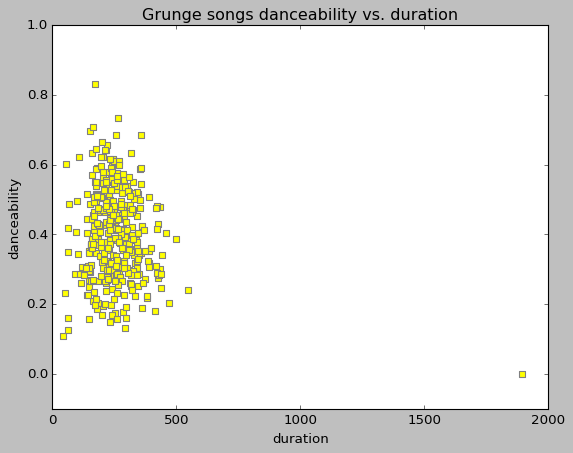

In [92]:
# Simple version

ax = plt.axes()
# ax;
ax.set(xlim=(0, 2000), ylim=(-0.1, 1), xlabel='duration', ylabel='danceability', title='Grunge songs danceability vs. duration')
ax.scatter(songs.duration, songs.danceability, c='yellow', edgecolors='grey', alpha=1, marker='s', s=30);

# `ax = plt.axes()`<br>
# `ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`<br>
# `ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<fill color>', edgecolors='<edgecolor>', s=<marker size>)`; <br>

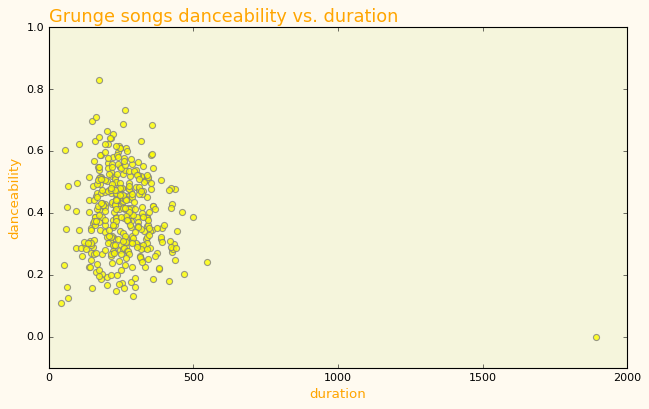

In [101]:
# Elaborated version, using plt.subplots()

fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='floralwhite', figsize=(8, 5))

# Plot the data on the Axes

ax.scatter(x=songs.duration, y=songs.danceability, color='yellow', edgecolors='grey', s=30, alpha=0.8)

# Set the Axes title, background color (face color), labels (incl. font sizes) and limits

ax.set_title('Grunge songs danceability vs. duration', fontsize=16, loc='left', color='orange')
ax.set_facecolor('beige')
ax.set_xlabel('duration', fontsize=12, color='orange')
ax.set_ylabel('danceability', fontsize=12, color='orange')
ax.set_xlim(0, 2000)
ax.set_ylim(-0.1, 1)

# Set the tick parameters<br>

ax.ticklabel_format(useOffset=False)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Display the plot<br>

plt.show()

###### 2. A brief analysis of the plot: What are the shortest/longest songs and their durations?

In [104]:
# display(<pd.df>['column'] <= <value>)                                    # Boolean mask
# display(type(<pd.df>['column'] <= <value>))                              # pd.Series
# display(<pd.df>[<pd.df>['column'] <= <value>]['column to to display'])   # select one column
# display(<pd.df>[<pd.df>['column'] <= <value>]['column 1  to to display', 'column 2 to display',...])   # select multiple columns

# Try this also with .loc[], as well as with .iloc[], with an explicitly set index and with .index
songs.loc[songs.duration > 1500, ['track', 'artists', 'album', 'duration']]
songs.loc[songs.track.str.startswith('All Apologies'), ['track', 'artists', 'album', 'duration']]

,track,artists,album,duration
19,All Apologies,Nirvana,In Utero,233
38,All Apologies/Gallons Of Rubbing Alcohol Flow ...,Nirvana,In Utero,1892


##### Line plot

Read the modified dataset (if necessary).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [105]:
songs = pd.read_csv('../data/grunge_v4.csv')

How many songs from each `release_year` are there?

In [106]:
# Use <pd.df>['<column>'].value_counts(), <pd.df>['<column>'].value_counts()[<specific value> in <column>]
songs.release_year.value_counts()

release_year
1994    36
2013    35
1996    29
1993    28
2016    27
1989    25
2009    24
1991    23
2017    19
2012    16
2002    15
1995    14
1992    14
2006    13
2000    13
1998    13
1990    12
2020    12
2018    10
1999     2
Name: count, dtype: int64

Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [108]:
# Define val_counts_sorted_by_index
val_counts_sorted_by_index = songs.release_year.value_counts().sort_index()
val_counts_sorted_by_index

release_year
1989    25
1990    12
1991    23
1992    14
1993    28
1994    36
1995    14
1996    29
1998    13
1999     2
2000    13
2002    15
2006    13
2009    24
2012    16
2013    35
2016    27
2017    19
2018    10
2020    12
Name: count, dtype: int64

Preparation for plotting (`counts` on y-axis, `release_year` on x-axis): get the `np.ndarray` version of `val_counts_sorted_by_index`, as well as of its index.

One way of doing it is to use `np.array()` over `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values`. However, the same effect is achieved using only `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values` (their type is `np.ndarray`).

In [111]:
years = val_counts_sorted_by_index.index
years
counts = val_counts_sorted_by_index.values
counts

array([25, 12, 23, 14, 28, 36, 14, 29, 13,  2, 13, 15, 13, 24, 16, 35, 27,
       19, 10, 12], dtype=int64)

And now plot it.

###### 1. Plotting using Matplotlib

[Matplotlib line plot example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html)<br>
[Excellent tutorial on matplotlib](https://realpython.com/python-matplotlib-guide/)
<br>
`ax = plt.axes()`<br>
`ax.set(xlim=(<lower limit>, <upper limit>), ylim=(<lower limit>, <upper limit>), xlabel='...', ylabel='...', title='...')`<br>
`ax.ticklabel_format(useOffset=False)`<br>
`ax.plot(<x>, <y>, color='...', marker='<marker type>', linewidth=<number>, alpha=<number>)`<br>

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Do not use `x=<x>, y=<y>` in `ax.plot()`, it generates an error. Use just `<x>, <y>`. For the other parameters, the keywords are necessary.

Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

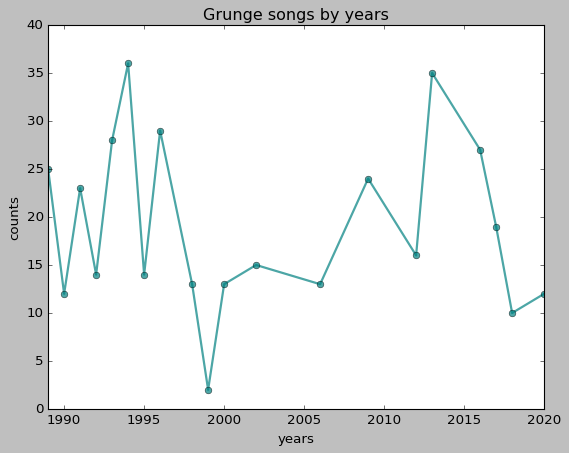

In [113]:
# Simple version

ax = plt.axes()
ax.set(xlim=(1989, 2020), ylim=(0, 40), xlabel='years', ylabel='counts', title='Grunge songs by years')
ax.ticklabel_format(useOffset=False)
ax.plot(years, counts, color='teal', marker='o', linewidth=2, alpha=0.7);

<em>Elaborated version 1, without `plt.subplots()`</em><br><br>

Set the Figure object parameters<br>

`plt.figure(layout='constrained', facecolor='<color>', figsize=(<x_size>, <y_size>))`<br>

Get the Axes object<br>

`ax = plt.axes()`<br>

Set the Axes object parameters<br>

`ax.set_facecolor('<color>')`<br>
`ax.set_title('<title>', fontsize=12, loc='left')`<br>
`ax.set_xlabel('<x_label>', fontsize=8)`<br>
`ax.set_ylabel('<y_label>', fontsize=8)`<br>

Without `plt.subplots()`, `xlim` and `ylim` have to be set using `ax.set()`<br>

`ax.set(xlim=(<m>, <n>), ylim=(<p>, <q>))`<br>

Set the tick parameters<br>

`ax.ticklabel_format(useOffset=False)`<br>
`ax.tick_params(axis='x', labelsize=6)`<br>
`ax.tick_params(axis='y', labelsize=6)`<br>

Display the plot using `ax.plot()`<br>

`ax.plot(<x>, <y>, color='<color>', linewidth=<linewidth>, alpha=<transparency>);`<br><br>

In `plt.figure(layout='constrained', facecolor='<color>', figsize=(<x_size>, <y_size>))`, using `layout='constrained'` is recommended to avoid overlapping of figure elements when changing the figure size. For a good figure size, use `figsize=(3.5, 2)` or similar.

It is also possible to set the Axes object background color using `plt.axes(facecolor='<color>')` instead of `ax.set_facecolor('<color>')`.

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Experiment with different font sizes for labels, title and ticks.

**Do not use `x=<x>, y=<y>` in `ax.plot()`, it generates an error. Use just `<x>, <y>`. For the other parameters, the keywords are necessary.**

Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

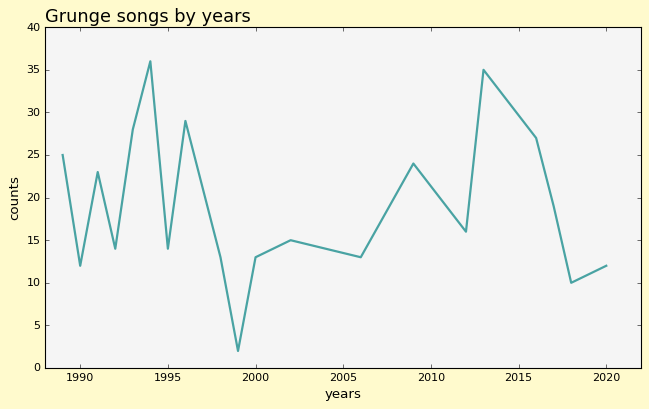

In [115]:
# Elaborated version 1 (without plt.subplots())

# Set the Figure object parameters
fig = plt.figure(layout='constrained', facecolor='lemonchiffon', figsize=(8, 5))
# Get the Axes object
ax = plt.axes()
# Set the Axes object parameters
ax.set_title('Grunge songs by years', fontsize=16, loc='left')
ax.set_xlabel('years', fontsize=12)
ax.set_ylabel('counts', fontsize=12)
ax.set_xlim(1988, 2022)
ax.set_ylim(0, 40)
ax.set_facecolor('whitesmoke')
# Without plt.subplots(), xlim and ylim have to be set using ax.set()

# Set the tick parameters
ax.ticklabel_format(useOffset=False)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# Display the plot using ax.plot()
ax.plot(years, counts, color='teal', linewidth=2, alpha=0.7);
# Set the Axes title, labels (incl. font sizes) and limits


<em>Elaborated version 2, using `plt.subplots()`</em><br><br>

Get the Figure and the Axes objects

`fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='color', figsize=(<x_size>, <y_size>))`

Plot the data on the Axes

`ax.plot(<x>, <y>, color='<color>', linewidth=<linewidth>, alpha=<transparency>)`

Set the Axes title, background color (face color), labels (incl. font sizes) and limits

`ax.set_title('<title>', fontsize=12, loc='left')`<br>
`ax.set_facecolor('<color>')`<br>
`ax.set_xlabel('<x_label>', fontsize=8)`<br>
`ax.set_ylabel('<y_label>', fontsize=8)`<br>
`ax.set_xlim(<m>, <n>)`<br>
`ax.set_ylim(<p>, <q>)`<br>

Set the tick parameters<br>

`ax.ticklabel_format(useOffset=False)`<br>
`ax.tick_params(axis='x', labelsize=6)`<br>
`ax.tick_params(axis='y', labelsize=6)`<br>

Display the plot<br>

`plt.show()`<br><br>

In `fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='color', figsize=(<x_size>, <y_size>))`, using `layout='constrained'` is recommended to avoid overlapping of figure elements when changing the figure size. For a good figure size, use `figsize=(3.5, 2)` or similar.

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Experiment with different font sizes for labels, title and ticks.

**Do not use `x=<x>, y=<y>` in `ax.plot()`, it generates an error. Use just `<x>, <y>`. For the other parameters, the keywords are necessary.**

Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

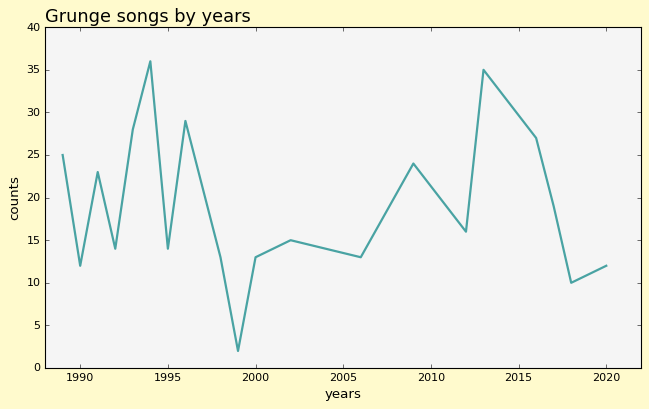

In [114]:
# Elaborated version 2, using plt.subplots()

# Get the Figure and the Axes objects
fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='lemonchiffon', figsize=(8, 5))
# Plot the data on the Axes
ax.plot(years, counts, color='teal', linewidth=2, alpha=0.7)
# Set the Axes title, labels (incl. font sizes) and limits
ax.set_title('Grunge songs by years', fontsize=16, loc='left')
ax.set_xlabel('years', fontsize=12)
ax.set_ylabel('counts', fontsize=12)
ax.set_xlim(1988, 2022)
ax.set_ylim(0, 40)
# Set the Axes background color (face color) 
ax.set_facecolor('whitesmoke')
# Set the tick parameters
ax.ticklabel_format(useOffset=False)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# Display the plot using plt.show()
plt.show()

###### 2. Smoothen the curves
Based on [this](https://stackoverflow.com/a/5284038/1899061).<br><br>
`from scipy.interpolate import make_interp_spline, BSpline`<br>

`<x> = <definition of x-axis variable>`<br>
`<y> = <definition of y-axis variable>`<br>

`<x_smooth> = np.linspace(<x>.min(), <x>.max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`<br>
`spl = make_interp_spline(release_year, counts, k=3)`&emsp;&emsp;&emsp;&emsp; # type: BSpline<br>
`<y_smooth> = spl(<x>_smooth)`<br>

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`<br>
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`<br>

`plt.plot(<x_smooth>, <y_smooth>)`<br>
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well<br>
`plt.show()`



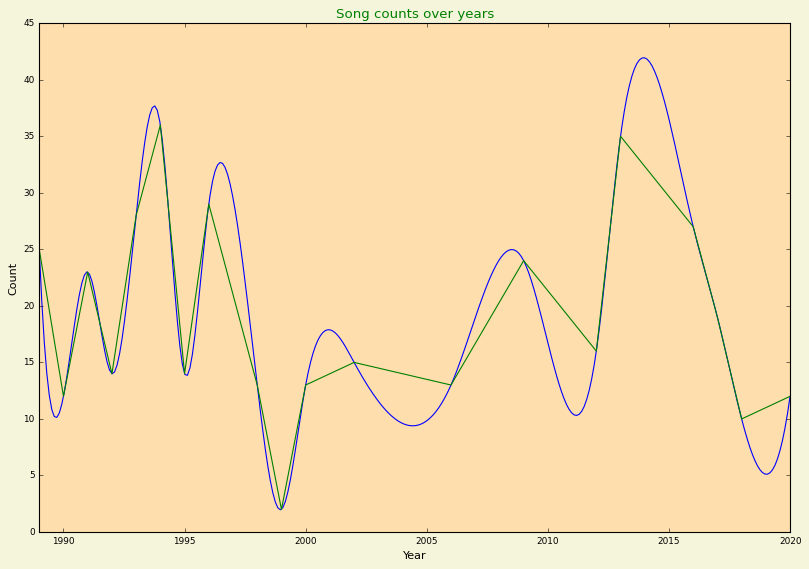

In [116]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

from scipy.interpolate import make_interp_spline, BSpline

year_smooth = np.linspace(years.min(), years.max(), 300)
spl = make_interp_spline(years, counts, k=3)  # type: BSpline
counts_smooth = spl(year_smooth)
#
# # plt.figure(layout='constrained', figsize=(5, 3), facecolor='lightyellow', alpha=0.5)
fig, ax = plt.subplots(figsize=(10, 7), layout='constrained', facecolor='beige')

ax.set_facecolor('navajowhite')

plt.ticklabel_format(useOffset=False)

plt.xlim([1989, 2020])
plt.ylim([0, 45])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Song counts over years', fontsize=12, color='green')

plt.plot(year_smooth, counts_smooth)
plt.plot(years, counts)
plt.show()

# # Alternatively
# ax = plt.axes()
# ax.set(xlim=(years.min()-1, years.max()+1), ylim=(150, 400), xlabel='release year', ylabel='count', title='Song counts over years')
# ax.ticklabel_format(useOffset=False)
# ax.plot(years, counts, color='steelblue', linewidth=2, marker='o', alpha=0.8)
# ax.plot(year_smooth, counts_smooth, color='green', linewidth=2, alpha=0.8);

###### 3. Multiple subplots
(shown here after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html))

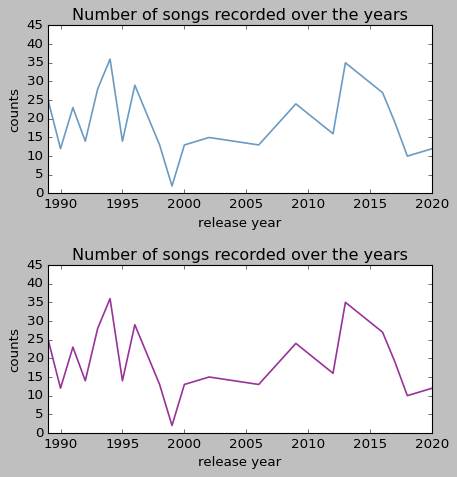

In [120]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# # #     0.1 - distance from the left edge of fig (grey area)
# # #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# # #     0.8 - distance from the right edge of fig (grey area)
# # #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # # Experiment with these numbers to get a better feeling for them
# 
# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));

# fig, ax = plt.subplots()
# ax


fig = plt.figure(figsize=(6, 6), )
# fig
ax1 = fig.add_axes([0.1, 0.579, 0.8, 0.35],
                   xlim=(1989, 2020), ylim=(0, 45),
                   xlabel='release year', ylabel='counts',
                   title='Number of songs recorded over the years')
ax2 = fig.add_axes([0.1, 0.08, 0.8, 0.35],
                   xlim=(1989, 2020), ylim=(0, 45),
                   xlabel='release year', ylabel='counts',
                   title='Number of songs recorded over the years')
# display(type(ax1))
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)

ax1.plot(years, counts, color='steelblue', linewidth=1.5, alpha=0.8)    # alpha: transparency (0-1)
ax2.plot(years, counts, color='purple', linewidth=1.5, alpha=0.8);      # alpha: transparency (0-1)

##### Histogram

Read the dataset (`grunge_visualization.csv`).

In [121]:
songs = pd.read_csv('../data/grunge_visualization.csv')

Plot the histogram of song durations (lengths, times).

Use Pandas to extract song lengths as a `pd.Series` object (`<pd.Series object> = <pd.df>['<column>']`).

In [123]:
# Get the song lengths as a pd.Series object
duration = songs.duration
duration

array([ 174,  138,  168,  162,  215,  246,  175,  250,  183,  203,  322,
        222,  103,  173,  218,  250,  194,  153,  151,  233,  115,  217,
        301,  254,  219,  183,  257,  142,  224,  156,  212,  232,  227,
        278,  169,  233,  289,   93, 1892,  289,  301,  325,  318,  390,
        284,  336,  273,  280,  435,  341,  275,  262,  342,  398,  358,
        315,  319,  321,  427,  334,  344,  282,  237,  352,  283,  426,
        240,  415,  256,  240,  338,  183,  180,  288,  284,  202,  432,
        327,  388,  245,  335,  248,  165,  340,  498,  423,  418,  259,
        254,  255,  157,  262,  244,  149,  189,  361,  338,  329,  374,
        309,  316,  230,   43,  316,  287,  206,  152,  285,  349,  242,
        222,  387,  277,  285,  195,  344,  262,  245,  311,  229,  265,
        286,  223,  374,  257,  221,  216,  362,  322,  354,  206,  158,
        185,  340,  253,  320,  221,  231,  225,  181,  230,  262,  168,
        182,  177,  170,  215,  238,  248,  160,  2

In [ ]:
# Convert the song lengths into a NumPy array (using <song lengths>.to_numpy() or np.array(<song lengths>))
duration = duration.values
duration

###### Plotting using Matplotlib

[Matplotlib histogram example](https://matplotlib.org/stable/gallery/statistics/hist.html)

Plot the histogram of the song lengths using Matplotlib.

Minimal version: `plt.hist(<x>, bins=<number of bins>);` or `sb.histplot(<x>, bins=<number of bins>)`.

Alternatively:<br>
`plt.figure(layout='constrained', facecolor='<color>', figsize=(3.5, 2), )`<br>
`ax = plt.axes()`<br>
`ax.set(xlabel='...', ylabel='...', title='...')`<br>
`ax.hist(<x>, bins=<number of bins>)`<br>

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme(palette='...')` (or just `sb.set()`, but that function might get deprecated and removed from *Seaborn* in the future). See [`sb.set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults. For `palette='...'` use any of the palettes shown with `plt.style.available`, or any of [these](https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative), or...

Elaborated version, using plt.subplots():

Get the Figure and the Axes objects

`fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='color', figsize=(<x_size>, <y_size>))`

Plot the data on the Axes

`ax.hist(x=<x>, bins=<number of bins>, color='<color>', linewidth=<linewidth>, edgecolor='<edgecolors>', alpha=<transparency>)`

Set the Axes title, background color (face color), labels (incl. font sizes) and limits

`ax.set_title('<title>', fontsize=12, loc='left')`<br>
`ax.set_facecolor('<color>')`<br>
`ax.set_xlabel('<x_label>', fontsize=8)`<br>
`ax.set_ylabel('<y_label>', fontsize=8)`<br>
`ax.set_xlim(<m>, <n>)`<br>
`ax.set_ylim(<p>, <q>)`<br>

Set the tick parameters<br>

`ax.ticklabel_format(useOffset=False)`<br>
`ax.tick_params(axis='x', labelsize=6)`<br>
`ax.tick_params(axis='y', labelsize=6)`<br>

Display the plot<br>

`plt.show()`<br><br>

In `fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', facecolor='color', figsize=(<x_size>, <y_size>))`, using `layout='constrained'` is recommended to avoid overlapping of figure elements when changing the figure size. For a good figure size, use `figsize=(3.5, 2)` or similar.

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Experiment with different font sizes for labels, title and ticks.

The `color` parameter can be abbreviated as `c` and is optional. The `marker` parameter is optional as well, and so is `edgecolor` (can be abbreviated as `ec`). They all have defaults. For other values of `color` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle.markers), respectively.

Examples of some parameters in `ax.hist()`: `color='steelblue'`, `linewidth=1` (the thickness of the dots/points rim), `alpha=0.8` (alpha: transparency (0-1)).

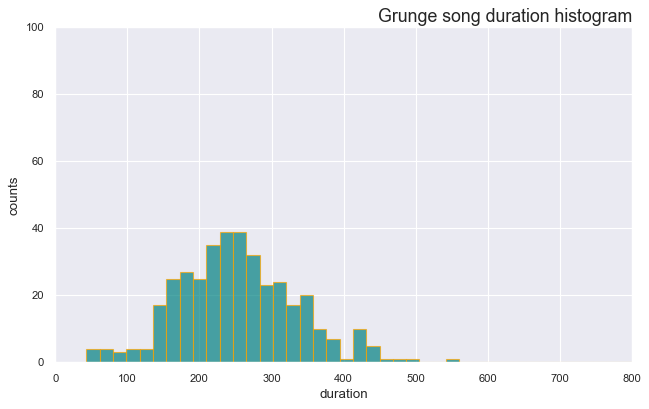

In [133]:
# Set plot style using sb.set_theme(palette='Pastel2')
sb.set_theme(palette='Pastel1')

# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins

# # Minimal version
# plt.hist(duration, bins=40);
# sb.histplot(duration, bins=40);

# # A more detailed version
# plt.figure(layout='constrained', figsize=(10, 7), facecolor='beige')
# ax = plt.axes()
# ax.set(xlim=(0, 2000), ylim=(0, 100), xlabel='time', ylabel='count', title='Song duration histogram')
# # ax.ticklabel_format(useOffset=False)
# ax.hist(duration, 40);

# Elaborated version, using plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=1, layout='constrained', figsize=(8, 5))
# Plot the data on the Axes
ax.hist(duration, bins=100, color='teal', edgecolor='orange', linewidth=1, alpha=0.7)
# Set the Axes title, labels (incl. font sizes) and limits
ax.set_title('Grunge song duration histogram', fontsize=16, loc='right')
ax.set_xlabel('duration', fontsize=12)
ax.set_ylabel('counts', fontsize=12)
ax.set_xlim(0, 800)
ax.set_ylim(0, 100)
# Set the Axes background color (face color) 
# ax.set_facecolor('whitesmoke')
# Set the tick parameters
ax.ticklabel_format(useOffset=False)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# Display the plot using plt.show()
plt.show()

##### Bar graph

Read the dataset (`'../data/grunge_visualization.csv'`) and make some minor transformations.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [134]:
# Get the songs as a pd.DataFrame object from 'data/grunge_visualization.csv', or from
# '../data/grunge_visualization.csv', or '../../data/grunge_visualization.csv', or ..., 
# depending on where the csv file is located
songs = pd.read_csv('../data/grunge_visualization.csv')

How many powerful, energetic, intense, loud, and possibly anthemic songs did each grunge band released during the grunge period?

Define a new feature (column in the `songs` dataframe), `powerful`, as a combination of `energy` and `loudness` - songs with `energy` and `loudness` above the corresponding 3rd quartiles are considered powerful.

In [135]:
# Run songs.describe() to see the 3rd quartiles
songs.describe()

,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,256.197368,2002.121053,0.077821,0.400984,0.769126,0.165122,5.636842,0.184954,-7.505326,0.702632,0.051062,127.639242,3.847368,0.409583
std,117.708981,10.266172,0.187597,0.126811,0.197177,0.271654,3.460247,0.137041,3.089279,0.457703,0.025236,29.777787,0.579207,0.213496
min,43.000000,1989.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.028000,-43.205000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,1993.000000,0.000086,0.304000,0.694250,0.000083,2.000000,0.096075,-8.928750,0.000000,0.033425,105.003250,4.000000,0.241750
50%,248.000000,1998.000000,0.002410,0.403500,0.834500,0.007255,6.000000,0.123500,-6.943500,1.000000,0.042600,125.346500,4.000000,0.374500
75%,306.250000,2013.000000,0.029575,0.487000,0.920250,0.233750,9.000000,0.238000,-5.597500,1.000000,0.062075,147.615250,4.000000,0.563500
max,1892.000000,2020.000000,0.980000,0.830000,0.990000,0.949000,11.000000,0.981000,-2.754000,1.000000,0.216000,217.913000,5.000000,0.969000


In [137]:
# Display the 3rd quartiles for selected candidate features to describe the new feature, 'poweful' 
# ('danceability', 'energy', 'liveness', 'loudness', 'tempo', 'valence')
songs.describe()[['energy', 'loudness', ]]

,energy,loudness
count,380.000000,380.000000
mean,0.769126,-7.505326
std,0.197177,3.089279
min,0.000020,-43.205000
25%,0.694250,-8.928750
50%,0.834500,-6.943500
75%,0.920250,-5.597500
max,0.990000,-2.754000


In [138]:
# Define threshold values for the candidate features (3rd quartiles, i.e. '75%')
thresholds = songs.describe()[['energy', 'loudness', ]].loc['75%']
thresholds

energy      0.92025
loudness   -5.59750
Name: 75%, dtype: float64

In [148]:
# Define the condition for a song to be powerful (songs with `energy` and `loudness` above the corresponding 3rd quartiles); 
# experiment with different combinations of candidate features
powerful_condition = (songs.energy >= thresholds['energy']) & (songs.loudness >= thresholds['loudness'])
powerful_condition.sample(10)

179    False
67     False
375    False
337    False
146    False
363     True
273     True
282    False
110    False
198    False
dtype: bool

In [150]:
# Define the new feature, 'powerful'
songs['powerful'] = powerful_condition
songs.powerful.sample(10)
songs

,track,artists,album,album_type,duration,release_year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,powerful
0,Blew,Nirvana,Bleach,studio album,174,1989,0.000006,0.411,0.882,0.014700,1,0.2980,-6.618,1,0.0556,129.848,4,0.531,False
1,Floyd The Barber,Nirvana,Bleach,studio album,138,1989,0.000788,0.443,0.878,0.560000,8,0.0623,-6.717,0,0.0418,136.567,4,0.683,False
2,About A Girl,Nirvana,Bleach,studio album,168,1989,0.000005,0.413,0.875,0.000580,6,0.2090,-7.480,0,0.0310,131.951,4,0.575,False
3,School,Nirvana,Bleach,studio album,162,1989,0.000012,0.210,0.943,0.493000,4,0.0739,-7.656,1,0.0785,164.844,4,0.130,False
4,Love Buzz,Nirvana,Bleach,studio album,215,1989,0.000031,0.479,0.865,0.228000,5,0.1820,-8.281,0,0.0339,137.902,4,0.770,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I Awake,Soundgarden,Louder Than Love,studio album,261,1989,0.311000,0.568,0.626,0.148000,4,0.1060,-12.019,0,0.0391,124.531,3,0.208,False
376,No Wrong No Right,Soundgarden,Louder Than Love,studio album,287,1989,0.032300,0.304,0.718,0.000034,7,0.1200,-10.645,0,0.0447,134.310,4,0.363,False
377,Uncovered,Soundgarden,Louder Than Love,studio album,270,1989,0.248000,0.379,0.820,0.000869,9,0.1470,-11.449,0,0.0458,151.157,3,0.187,False
378,Big Dumb Sex,Soundgarden,Louder Than Love,studio album,251,1989,0.005510,0.267,0.848,0.000491,6,0.4940,-9.546,0,0.0584,175.458,4,0.483,False


In [152]:
# Display these powerful songs and their performers
songs.loc[songs.powerful, ['track', 'artists']]

,track,artists
16,On A Plain,Nirvana
47,Never Fade,Alice In Chains
68,Lesson Learned,Alice In Chains
82,So Close,Alice In Chains
119,Superblood Wolfmoon,Pearl Jam
121,Quick Escape,Pearl Jam
124,Never Destination,Pearl Jam
130,Getaway,Pearl Jam
142,Gonna See My Friend,Pearl Jam
144,The Fixer,Pearl Jam


How many grunge songs have been powerful, in terms of the definition of `songs.powerful` shown above?

In [153]:
songs.powerful.sum()

47

<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

In [155]:
songs.to_csv('../data/grunge_visualization_powerful.csv', index=False)

###### Preparing the data for plotting the bar graph

Group the data - group the songs by artists.

In [156]:
songs_by_artists = songs.groupby('artists')

Use `get_group(<artists>)` to get all songs by a selected performer and `value_counts()` over the resulting group's `powerful` column (showing the `True` and `False` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

In [159]:
songs_by_artists.get_group('Soundgarden').powerful.value_counts()

powerful
False    100
True      16
Name: count, dtype: int64

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `artists` column, and then optionally `list()` over the resulting array to make the list of artists.

In [160]:
artists = songs.artists.unique()
artists

array(['Nirvana', 'Alice In Chains', 'Pearl Jam', 'Soundgarden'],
      dtype=object)

For y-axis, create the lists of the numbers of powerful songs (`powerful`) and of the other ones (`not_powerful`).
(Start from two empty lists. Loop over the list of artistss created in the previous step, `get_group()` for each artist/band and append the `value_counts()[True]` of the `powerful` column of the current artist (`a['powerful']`) to `powerful` if any of `a['powerful']` has the value `True`, otherwise append 0. Do the similar thing for `not_powerful`. Display both lists in the end to double-check the result.)

In [162]:
powerful = []
non_powerful = []
for a in artists:
    s = songs_by_artists.get_group(a)
    powerful.append(s.powerful.value_counts()[True] if any(s.powerful) else 0)
    non_powerful.append(s.powerful.value_counts()[False] if not all(s.powerful) else 0)
powerful
non_powerful

[38, 76, 119, 100]

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `pwerful` and `not_powerful` as the columns, <u>and the list of artists created above as the index of the dataframe</u>.

In [163]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)

df = pd.DataFrame({'powerful': powerful, 'non powerful': non_powerful}, index=artists)
df

# list(artists)


,powerful,non powerful
Nirvana,1,38
Alice In Chains,3,76
Pearl Jam,27,119
Soundgarden,16,100


###### Alternative 1 - plotting the bargraph using Pandas (`<pd.df>.plot.bar()`)

[Pandas bargraph example](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

Use `ax = <pd.df>.plot.bar()` to plot the bargraph.

Relevant parameters:
- `figsize=(<width>, <height>)` (e.g., (6, 6))
- `rot=<rotation angle [degrees]>` for the x-axis labels
- `ylim=(<from>, <to>)`
- `color={'powerful': 'limegreen', 'not_powerful': 'navajowhite'}` (for a list of Matplotlib named colors, see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors))
- `edgecolor='<color of bin lines>'`
- `title='<title>'`
- `xlabel='<xlabel>'`
- `ylabel='<ylabel>'`
- `fontsize=<fontsize>` (for all text; suitable fontsizes are 10, 12,...)
- `stacked=True` (the bins for the same x-axis value stacked on top of one another)

Alternatively, set just a few parameters within ``, and use the relevant `Axes` methods for the rest:

Set the Axes title, background color (face color), labels (incl. font sizes) and limits

`ax.set_title('<title>', fontsize=12, loc='left')`<br>
`ax.set_facecolor('<color>')`<br>
`ax.set_xlabel('<x_label>', fontsize=8)`<br>
`ax.set_ylabel('<y_label>', fontsize=8)`<br>
`ax.set_xlim(<m>, <n>)`<br>
`ax.set_ylim(<p>, <q>)`<br>

Set the tick parameters<br>

`ax.ticklabel_format(useOffset=False)`<br>
`ax.tick_params(axis='x', labelsize=6)`<br>
`ax.tick_params(axis='y', labelsize=6)`<br>

Display the plot<br>

`plt.show()`<br><br> 

To show labels (counts) in each bin container, use:

`for c in ax.containers:`<br>
&emsp;&emsp;`ax.bar_label(c, label_type='center')`

If the labels (counts) in each container are not needed, the returned value (`ax`) is usually unnecessary and can be omitted.

It is <b>a very good idea</b> to also use `plt.tight_layout()` <b>after</b> `<pd.df>.plot.bar()` to avoid cutoffs at the bottom of the figure.  

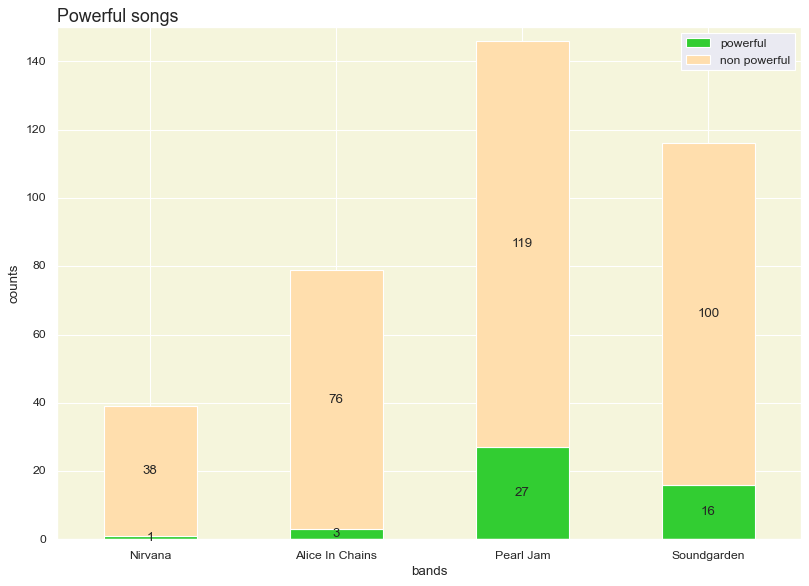

In [174]:
ax = df.plot.bar(figsize=(12, 8), rot=0, ylim=(0, 150), color={'powerful': 'limegreen', 'non powerful': 'navajowhite'},
                 stacked=True)

ax.set_facecolor('beige')

ax.set_title('Powerful songs', fontsize=16, loc='left')
ax.set_xlabel('bands', fontsize=12)
ax.set_ylabel('counts', fontsize=12)

for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.show()

###### Alternative 2 - plotting the bargraph using Seaborn (`sb.countplot()`)

Use `ax = sb.countplot()` to plot the bargraph.

Relevant parameters:
- `data=<pd.df>`
- `x='<column 1>'` (e.g., 'artists')
- `hue='<column 2>'` (e.g., 'powerful`)
- `palette='<palette>'` (e.g., 'Set2'; it is also possible to define custom palletes using Hex codes, e.g. `palette=['#432371','#FAAE7B']`)
- `dodge=False` to make the bargraph **seemingly stacked** (the containers are not on top of each other, they just overlap); if no stacking is needed (which is a recommended option here), hust omit `dodge=False`

**Making the bargraph really stacked (its containers on top of each other) uses (`dodge=False`), but it cannot be done directly (no kwarg for that, i.e. no specific feature for that in `Seaborn.countplot()`), only with some extra work** (see a possible solution [here](https://stackoverflow.com/a/67116235/1899061)).

If necessary, use `plt.xticks(rotation=<rotation angle [degrees]>)` before `sb.countplot()`.

Note that `ax = sb.countplot()` returns a `pd.Axes` object, so after the call to `ax = sb.countplot()` all `pd.Axes` methods can be called (like `ax.set_title(title='<title>'`, `ax.set_ylim(...)`, etc.). 

To show labels (counts) in each bin container, use:

`for c in ax.containers:`<br>
&emsp;&emsp;`ax.bar_label(c, label_type='center')`

If the labels (counts) in each container are not needed, the returned value (`ax`) is usually unnecessary and can be omitted.



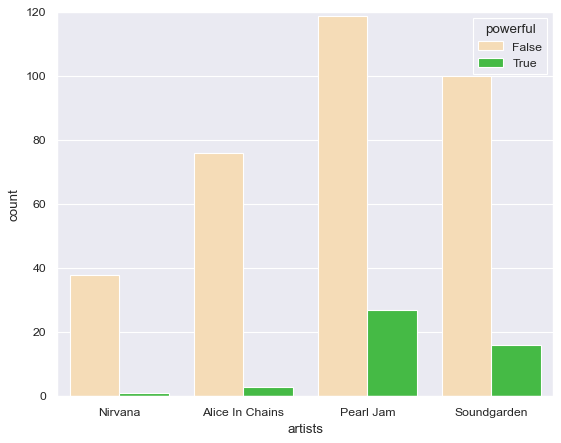

In [176]:
# plt.figure(figsize=(8, 6), facecolor='navajowhite')
# plt.xticks(rotation=90)

# ax = sb.countplot(data=songs, x='artists', hue='powerful', palette='Set2', dodge=True)
ax = sb.countplot(data=songs, x='artists', hue='powerful', palette=['navajowhite', 'limegreen'], dodge=True)
plt.show()

##### Box plot
[Seaborn boxplot example](https://seaborn.pydata.org/generated/seaborn.boxplot.html) (used here as the role model)

For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sb.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

Read the dataset (`'data/grunge_visualization.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [177]:
# Get the songs as a pd.DataFrame object from 'data/grunge_visualization.csv', or from
# '../data/grunge_visualization.csv', or '../../data/grunge_visualization.csv', or ..., depending on where the csv file is located
songs = pd.read_csv('../data/grunge_visualization.csv')

Use `sb.boxplot(y='<column>' | x='<column>', palette='<palette>', hue=1, legend=False)` to plot some boxplots.

For a single-column boxplot, relevant parameters are `y=<pd.df>['column']` (for 'vertical' boxplot) or `x=<pd.df>['column']` (for 'horizontal' boxplot), and `palette='<palette>'` (e.g., 'Set3', 'pastel', ...; see the links above for other named color palettes). <u>Note that in case `palette` is used, it is also necessary to use `hue=<n>`, where `<n>` can be any value, e.g. 1</u>.

For a multiple-column boxplot, relevant parameters are `data=<pd.df>[['column1', 'column2',...]]`, `orient='v'` (for 'vertical' boxplot) and `palette='<palette>'`. No `hue` is needed, no `legend`.

<Axes: >

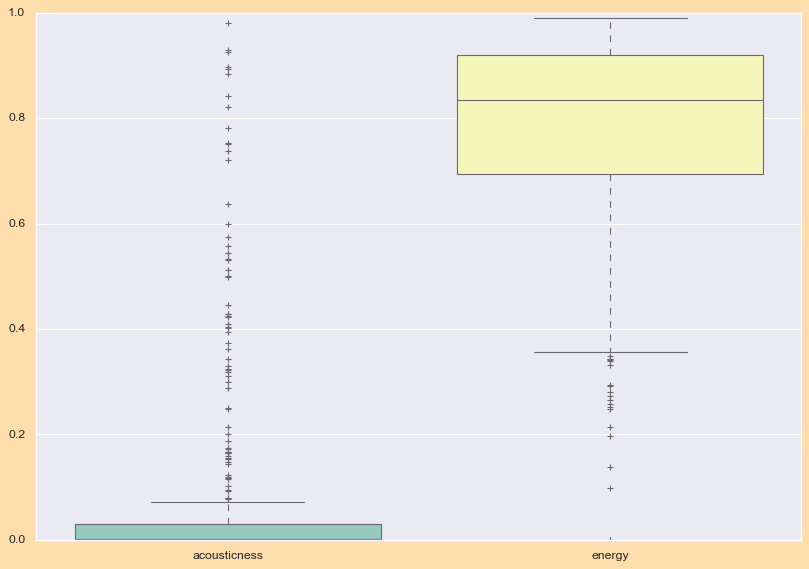

In [187]:
# display(sb.palettes.SEABORN_PALETTES.keys())

plt.figure(layout='constrained', facecolor='navajowhite', figsize=(10, 7), )

# For a single column (e.g., duration)
# sb.boxplot(x=songs.duration, palette='deep6', hue=1, legend=False);
# plt.tight_layout()

# Alternatively
# sb.boxplot(data=songs, y='duration', palette='Set1', hue=1, legend=False)

# For multiple columns (e.g., energy and acousticness)
sb.boxplot(data=songs[['acousticness', 'energy']], orient='v', palette='Set3')


##### Violin plot
[Seaborn violin plot example](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Read the dataset (`'../data/grunge_visualization.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [193]:
# Get the songs as a pd.DataFrame object from ''../data/grunge_visualization.csv'', or from
# '../data/grunge_visualization.csv', or '../../data/grunge_visualization.csv', or ..., depending on where the csv file is located
songs = pd.read_csv('../data/grunge_visualization.csv')

Use `sb.violinplot()` like: `x=<pd.df>.loc[<index>, '<column for x-axis>']`, `sb.violinplot(data=<pd.df>, x=x, y=<pd.df>['<column for y-axis>'], hue=x, palette='<palette>', legend=False)`.

For example, if the violin plot should represent density/boxplot diagram of song `duration` in certain `release_year`s, then `<column for x-axis>` is `release_year` and `<column for y-axis>` is `duration`. Good values for `'<palette>'` are, e.g., 'Set3', 'pastel',...).

It is a good practice to set the `x` parameter directly before the call to `sb.violinplot()`, and then use `x=x` in `sb.violinplot()`. Using `x=<pd.df>.loc[<index>, '<column for x-axis>']` within the call to `sb.violinplot()` (like call to `sb.violinplot(x=<pd.df>.loc[<index>, '<column for x-axis>'], y=..., ...)`) might generate an error.

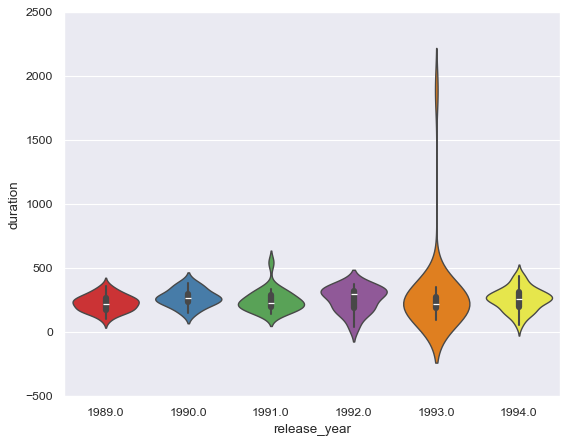

In [194]:
# plt.figure(layout='constrained', facecolor='navajowhite', figsize=(5, 3), )

# # Alternatively, set x and y explicitly and then call sb.violinplot() as
# # sb.violinplot(data=songs, x=x, y=y, hue=x, palette='Set1', legend=False);
x=songs.loc[songs.release_year < 1995, 'release_year']
y=songs.duration
sb.violinplot(data=songs, x=x, y=y, hue=x, palette='Set1', legend=False);

##### Heat map
[Seaborn heat map example](https://seaborn.pydata.org/generated/seaborn.heatmap.html) (used here as the role model)

To create a heatmap, create the corresponding pivot table first. [An intuitive visual explanation of pivot tables](https://support.microsoft.com/en-us/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96#:~:text=A%20PivotTable%20is%20an%20interactive,unanticipated%20questions%20about%20your%20data.) (start from [this raw table](https://support.microsoft.com/en-us/office/create-a-pivottable-to-analyze-worksheet-data-a9a84538-bfe9-40a9-a8e9-f99134456576), and then see [the corresponding pivot table](https://support.microsoft.com/en-us/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96#:~:text=A%20PivotTable%20is%20an%20interactive,unanticipated%20questions%20about%20your%20data.) (expand <em>About Pivot Tables</em>)).


Read the dataset (`'../data/grunge_visualization.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [195]:
# Get the songs as a pd.DataFrame object from ''../data/grunge_visualization.csv'', or from
# '../data/grunge_visualization.csv', or '../../data/grunge_visualization.csv', or ..., depending on where the csv file is located
songs = pd.read_csv('../data/grunge_visualization.csv')

The idea: categorize songs according to their *valence*.

<Axes: xlabel='valence', ylabel='Density'>

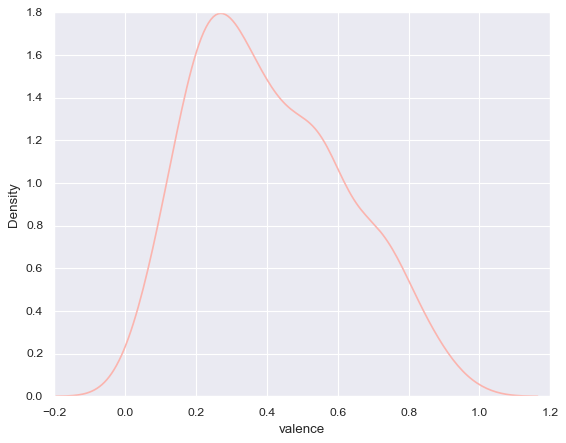

In [196]:
# # Plot the density function for 'valence'
# sb.kdeplot(data=songs, x='valence')
sb.kdeplot(data=songs, x='valence')

###### Alternative 1 - using `pd.qcut()`
Create a new column in the dataframe, e.g. `valence_category`, using `pd.qcut()` function to split the entire range of `songs.valence` values into five equally sized subranges, `Very Low` to `Very High` (with ~equal number of elements in each subrange): `songs['valence_category'] = pd.qcut(songs.valence, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])`.

In [197]:
# Create the new column
songs['valence_category'] = pd.qcut(songs.valence, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [199]:
# Check the type of its values using type(<pd.df>.<new column>.values)
type(songs.valence_category.values)
# Display the categories in the new column using <pd.df>.<new column>.cat.categories
songs.valence_category.cat.categories

Index(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype='object')

In [200]:
# Check value_counts() for 'valence_category' (the counts should be more or less equal)
songs.valence_category.value_counts()

valence_category
Very Low     76
Low          76
Medium       76
High         76
Very High    76
Name: count, dtype: int64

###### Alternative 2 - using `pd.cut()`
Create a new column in the dataframe, e.g. `valence_category`, using `pd.cut()` function to split the entire range of `songs.valence` values into five subranges, `Very Low` to `Very High` (with  generally *unequal* number of elements in each subrange): `songs['valence_category'] = pd.cut(songs.valence, bins=[<bin edges>], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], include_lowest=True)`. Depending on the value of `bins` parameter, the subranges are either equally *spaced* (`bins=<number of subranges>`), or the edges of each subrange interval are specified in `bins` explicitly. Note that there must be one more `<bin edges>` than bins (defined in `labels`). 

Note also that the ranges of values in the bins are defined as `(...]`. Thus make sure to include `include_lowest=True` in the call to `pd.cut()` to include the lowest value in the first bin (i.e., to get its range as `[...]`, not as `(...]`). The highest value in the last bin is always included.

In [201]:
# Extract mean, median and other values of valence as v_mean, v_median, etc. from songs.valence.describe().values, to be used as bin edges
songs.describe()['valence']

count    380.000000
mean       0.409583
std        0.213496
min        0.000000
25%        0.241750
50%        0.374500
75%        0.563500
max        0.969000
Name: valence, dtype: float64

In [202]:
# Define the list of bin edges (v_min, v_mean, v_median, etc.)
_, v_mean, _, v_min, v_q1, v_median, v_q3, v_max = songs.describe()['valence'].values
bin_edges = [v_min, v_q1, v_median, v_mean, v_q3, v_max]
# Dafine the list of bin labels ('Very Low','Low', etc.)
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# Create 'valence_category' using pd.cut(songs['valence'], ...)
songs['valence_category'] = pd.cut(songs.valence, bins=bin_edges, labels=labels, include_lowest=True) # (..], [..]

In [205]:
# Check the type of its values using type(<pd.df>.<new column>.values)
type(songs.valence_category.values)
# Display the categories in the new column using <pd.df>.<new column>.cat.categories
songs.valence_category.cat.categories

Index(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype='object')

In [206]:
# Check value_counts() for 'valence_category' (in general, the counts should NOT be equal)
songs.valence_category.value_counts()

valence_category
Very Low     95
Low          95
Very High    95
High         78
Medium       17
Name: count, dtype: int64

###### Alternative 3 - create `valence` categories manually
For example, split the range of `valence` to five subranges, `Very Low` to `Very High` according to the following criteria: 
- `Very Low` is the *valence* from 0 to the first quartile (`songs.valence.describe()['25%']`)
- `Low` is the *valence* from the first quartile to the mean value (`songs.valence.describe()['mean']`), since the mean value is lower than the median value
- `Medium` is the *valence* from the mean value to the median value (`songs.valence.describe()['50%']`)
- `High` is the *valence* from the median value to the third quartile (`songs.valence.describe()['75%']`)
- `Very High` is the *valence* from the third quartile to 1

In [ ]:
# Extract mean, median and other values of valence as v_mean, v_median, etc. from songs.valence.describe().values


Insert a new column, e.g. `valence_category` and set it to the default value `Medium`. Then split the range of `valence` to five subranges, `Very Low` to `Very High` (find the `max()` of `valence` first). Each such a subrange is actually an index of selected songs, based on the value of `valence` (e.g., `very_low = songs['valence'] < 10`). Then use `<pd.df>.loc[<index of selected observations>, <relevant column>]` to change the default value `Medium` where appropriate (e.g., `songs.loc[very_low, 'valence_category'] = 'Very Low'`).

In [ ]:
# Insert a new column, e.g. valence_category and set it to the default value 'Medium'. 
# Then split the range of valence to five subranges, 'Very Low' to 'Very High.


<u>Save this version as a new *.csv* file, e.g. `grunge_visualization_valence_categories.csv`, for possible use in other examples.</u> (`<pd.df>.to_csv('<path>')`)

In [208]:
songs
songs.to_csv('../data/songs_visualization_valence_categories.csv', index=False)

Rearrange the categories of `valence_category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

In [209]:
songs['valence_category'] = pd.Categorical(songs.valence_category, categories=['Very High', 'High', 'Medium', 'Low', 'Very Low'], ordered=True)

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values`: e.g. `acousticness` or `tempo`
- `index`: to be shown on y-axis, e.g. `valence_category`
- `columns`: to be shown on x-axis, e.g. `release_year`

In [210]:
# pivot_table = songs.pivot_table(values='energy', index='valence_category', columns='release_year')
pt = songs.pivot_table(values='acousticness', index='valence_category', columns='release_year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap (alternatively, use something like `plt.figure(layout='constrained', facecolor='navajowhite', figsize=(5, 3.5))`). Here `rc` stands for 'run command' - essentially, configurations which will execute when running the code. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).

Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use `'.0f'` to show int values in annotations, not scientific notation (`'g'` for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is `viridis`

To set the title for the heatmap, or to change the axes labels, use (<b>AFTER</b> the call to `sb.heatmap()`!) something like:

`plt.title('<title>', loc='left', color='<color>', alpha=0.4, size=14)`<br>
`plt.xlabel('<xlabel>', size=<font size>, color='<color>')`<br>
`plt.ylabel('<ylabel>', size=<font size>, color='<color>')`<br>
`plt.show()`    # it's a must

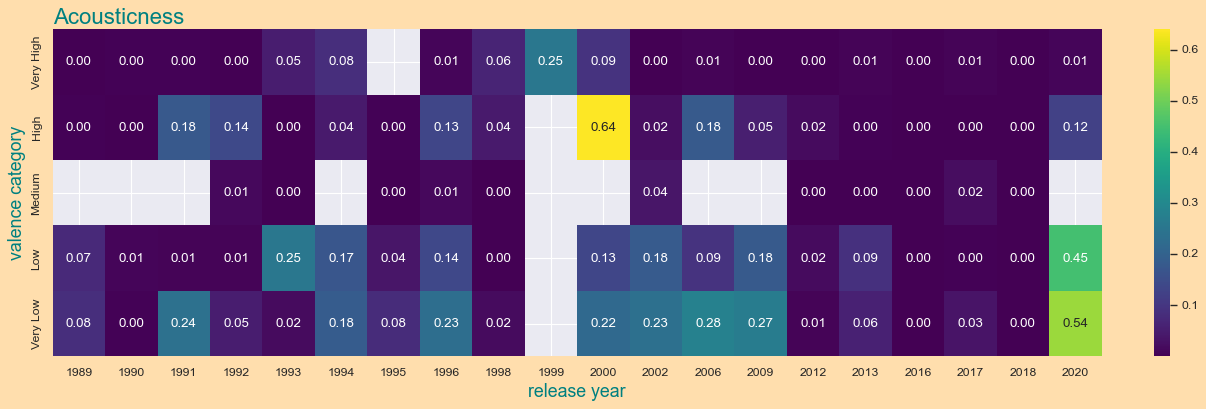

In [213]:
# sb.set_theme(rc={'figure.figsize': (15.7, 5.27)})
plt.figure(layout='constrained', facecolor='navajowhite', figsize=(15, 5))
sb.heatmap(data=pt, annot=True, fmt='.2f', cmap='viridis');
plt.title('Acousticness', loc='left', color='teal', size=20)
plt.xlabel('release year', size=16, color='teal')
plt.ylabel('valence category', size=16, color='teal')
plt.show()

In [215]:
songs.loc[(songs.acousticness > 0.6) & (songs.release_year == 2000), ['track', 'artists', 'album', 'valence_category']]
songs.loc[(songs.acousticness > 0.5) & (songs.release_year == 2020), ['track', 'artists', 'album', 'valence_category']]

,track,artists,album,valence_category
127,Comes Then Goes,Pearl Jam,Gigaton,Low
129,River Cross,Pearl Jam,Gigaton,Very Low


##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs.

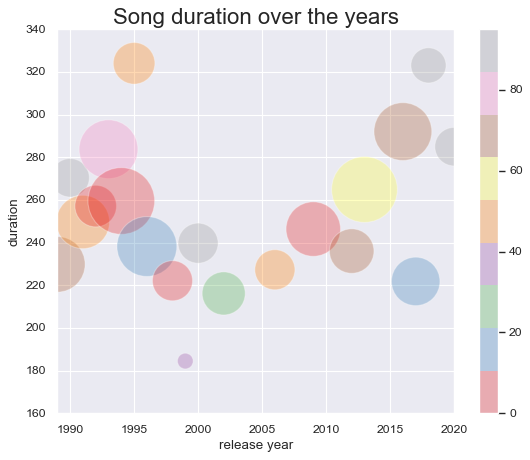

In [216]:
songs = pd.read_csv('../data/grunge_visualization_valence_categories.csv')
songs_by_year = songs.groupby('release_year')
years = np.sort(songs.release_year.unique())
years

avg_duration = []
for year in years:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['duration']))
avg_duration = np.array(avg_duration)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years), replace=False)                    # random sample, no duplicates
# display(colors)

sizes = []
for year in years:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                  # sizes proportional to the numbers of songs

plt.title('Song duration over the years', fontdict={'size': 20})
plt.xlabel('release year')
plt.ylabel('duration')
plt.xlim(1989, 2020)
plt.ticklabel_format(useOffset=False)
plt.scatter(years, avg_duration,
            c=colors, s=sizes, alpha=0.3,                                   # alpha: the level of transparency
            cmap='Set1')                                                    # cmap: a pre-defined color map
plt.colorbar();                                                             # show color scale
# # 
# # # Alternatively, but without showing the colorbar
# # ax = plt.axes()
# # ax.set(xlabel='release year', ylabel='duration', xlim=(1989, 2020),
# #        title='Song duration over the years')
# # plt.ticklabel_format(useOffset=False)
# # ax.scatter(years, avg_duration,
# #            c=colors, s=sizes, alpha=0.3,                                    # alpha: the level of transparency
# #            cmap='Set1');                                                    # cmap: a pre-defined color map